# Predicting if income is greater than $50k a year

## Look at the Big picture
The task at hand is to predict whether an individuals annual income is greater than $50k a year.
This is a binary classification problem, which means you have to evaluate the model using precision, recall and f score.
Currently the models performing the best are Xgboost in terms of accuracy (87.224) and Support Vector Classification in terms of precision (88.032).


## Get the data
The data is available from the ucimlrepo, so we will load it in here

In [1]:
#import libraries
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
data = adult.data.features 
targets = adult.data.targets 
  
# metadata 
#print(adult.metadata) 
  
# variable information 
print(adult.variables) 
print(f"There are {len(data)} datapoints in the set")

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

Then we have to split the data into a training and a test set. We do this as early as possible to avoid snooping bias. We use Sickit-Learns split function to do so. We split the data with 80% for training and 20% for test. As this is not the largest dataset, with only 48842 datapoints. We therefore need enough datapoints for testing in the end to make sure the model is generalizable. We set a random_State to make sure the data is split the same every time the code is run.

In [3]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2, random_state=42)


## Explore and Visualize the data
Now that we have split the dataset, we can start to explore and visualize the data, to gain a better understanding of it.
To do this, first we will copy the data, so we can always go back to the original data
Then we will look at the different attributes of the data

In [4]:
train_data_copy, train_targets_copy = train_data.copy(), train_targets.copy()
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       38301 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      38299 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  38861 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


We have 8 features which are of object type, and 6 features which are of int64 type.
To further explore this, look at the top 5 rows of the dataset.

In [5]:
train_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
37193,32,Private,50753,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
31093,45,State-gov,144351,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
33814,35,Local-gov,252217,12th,8,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
14500,64,Private,69525,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,20,United-States
23399,63,Self-emp-not-inc,28612,HS-grad,9,Widowed,Sales,Not-in-family,White,Male,0,0,70,United-States


Here we see that workclass, education, education-num (we know this from documentation), marital-status, occupation, relationship, race, sex (binary), and native-country are categorical data. Therefore we want to explore which categories there are, and how many are in each category.

In [6]:
def printValueCounts(data,category):
    print(data[category].value_counts())
printValueCounts(train_data_copy,"workclass")
printValueCounts(train_data_copy,"education")
printValueCounts(train_data_copy,"education-num")
printValueCounts(train_data_copy,"marital-status")
printValueCounts(train_data_copy,"occupation")
printValueCounts(train_data_copy,"relationship")
printValueCounts(train_data_copy,"race")
printValueCounts(train_data_copy,"sex")
printValueCounts(train_data_copy,"native-country")

workclass
Private             27177
Self-emp-not-inc     3034
Local-gov            2509
State-gov            1595
?                    1450
Self-emp-inc         1378
Federal-gov          1132
Without-pay            17
Never-worked            9
Name: count, dtype: int64
education
HS-grad         12661
Some-college     8695
Bachelors        6421
Masters          2144
Assoc-voc        1628
11th             1440
Assoc-acdm       1269
10th             1156
7th-8th           739
Prof-school       652
9th               609
12th              527
Doctorate         473
5th-6th           406
1st-4th           189
Preschool          64
Name: count, dtype: int64
education-num
9     12661
10     8695
13     6421
14     2144
11     1628
7      1440
12     1269
6      1156
4       739
15      652
5       609
8       527
16      473
3       406
2       189
1        64
Name: count, dtype: int64
marital-status
Married-civ-spouse       17909
Never-married            12914
Divorced                  5297
Se

We also want to look at the other fields.

In [7]:
train_data_copy.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,39073.000000,3.907300e+04,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.632662,1.900070e+05,10.077675,1091.418038,87.276610,40.400788
std,13.737816,1.058195e+05,2.565268,7500.039346,402.816969,12.393669
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782720e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.382460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We can also display the data as histograms.

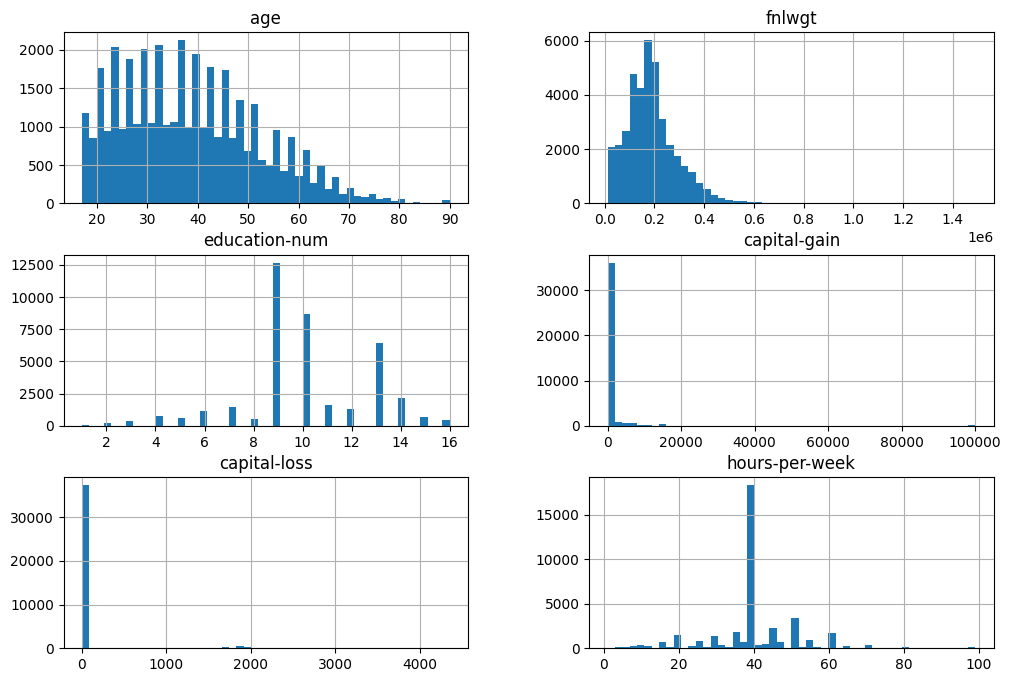

In [8]:
train_data_copy.hist(bins=50, figsize=(12,8))
plt.show()

Here we see that the bins are a little too small, as the age histogram have every other bin be larger than the previous. We will fix this by changing the bin size

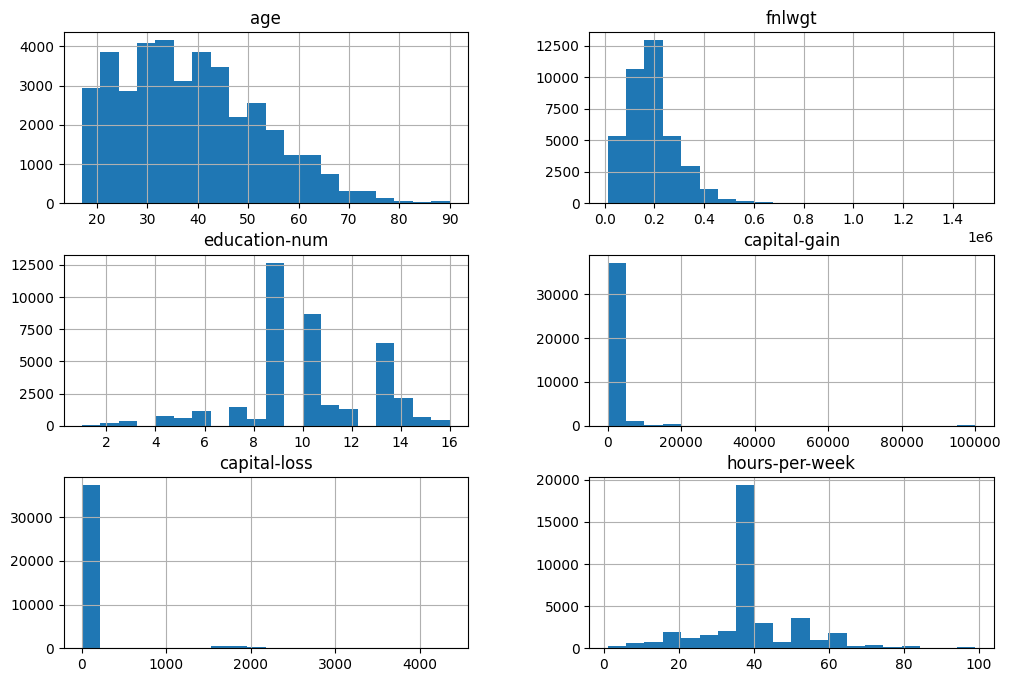

In [9]:
train_data_copy.hist(bins=20, figsize=(12,8))
plt.show()

As we can see,education-num and hours-per-week is fairly well distributed but the age, fnlwgt, the capital-loss, and the capital-gain, which both features some outliers. We will tackle this later.
Based on the data displayed in the different steps, we see that we have to make imputations in workclass, occupation and native-country. We will also use one hot encoding for all the categorical attributes. We will correct the skew of the fnlwgt and age, and we will look a bit more on the capital-gain and -loss. We will then standardize all the numerical attributes.

## Prepare the data for machine Learning Algorithms

First we will impute Workclass, occupation, and native-country. As all these are categorical, we will just made a new category called "unknown" and impute this on all non-available instances. We will then get the info to see that all features have the same amount of elements.

In [10]:
imputation = "Unknown"
train_data_copy["workclass"].fillna(imputation, inplace=True)
train_data_copy["occupation"].fillna(imputation, inplace=True)
train_data_copy["native-country"].fillna(imputation, inplace=True)
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       39073 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      39073 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  39073 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


C:\Users\FrederikDesktop\AppData\Local\Temp\ipykernel_23860\821838249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_copy["workclass"].fillna(imputation, inplace=True)
C:\Users\FrederikDesktop\AppData\Local\Temp\ipykernel_23860\821838249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

We then want to Encode all the categorical attributes using a one hot encoder. We will do this to all categorical but the education, which is already nominally encoded. This is because there is an order to education, and it is encoded in the education-num feature.

In [11]:
train_data_categories = train_data_copy[["workclass", "marital-status", "occupation", "relationship", "race", "native-country"]]
ont_hot_encoder = OneHotEncoder()
ont_hot_encoder.handle_unknown = "ignore"
train_data_cat_1hot = ont_hot_encoder.fit_transform(train_data_categories)

We then want to look at the age, capital-gain and -loss individually

<Axes: >

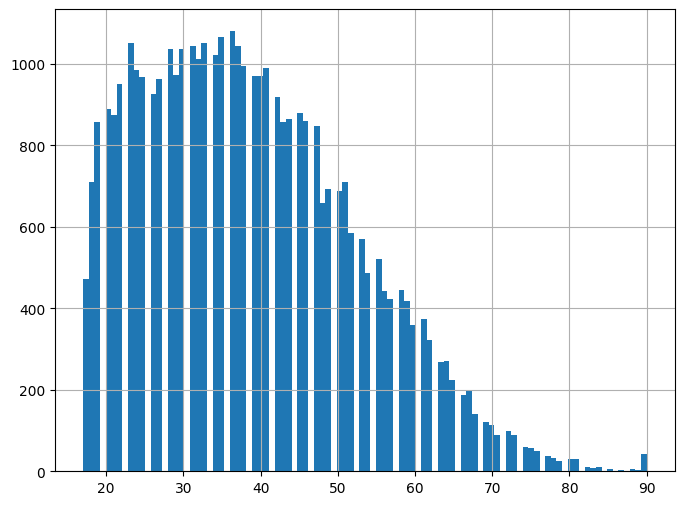

In [12]:
train_data_copy["age"].hist(bins=100, figsize=(8,6))

As we can see there are some funny "holes" in the data, therefore we are going to bin the age feature into 20 bins as we had it show earlier. However, before we bin the variable we are going to correct for skew. We will do this by taking the log of the age. 
Furthermore, we are going to use bin-labels 1-20, this is because it keeps the "relationship" between the data fairly intact, furthermore the data is now of categorical type, meaning we dont need the exact age.

<Axes: >

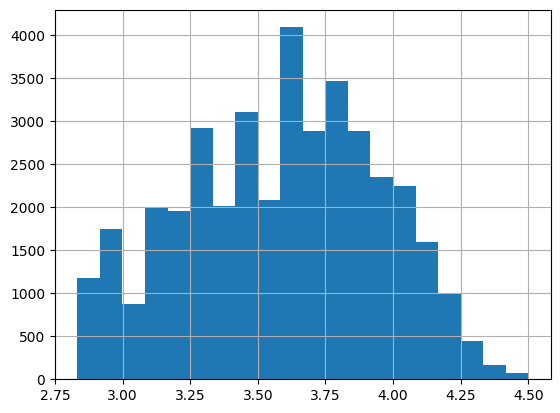

In [13]:
train_data_copy['age'] = np.log(train_data_copy['age'])
train_data_copy['age_binned'] = pd.cut(train_data_copy['age'], bins=20, labels=range(1, 21))
train_data_copy["age"].hist(bins=20)

As we can see this helped the skew, however we still have some "holes", so we will try to bin the data even closer.

<Axes: >

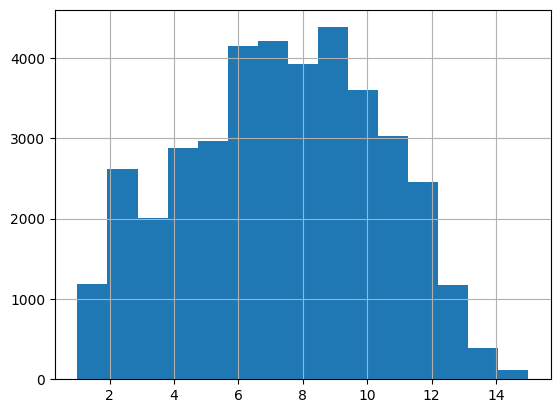

In [14]:
train_data_copy['age_binned'] = pd.cut(train_data_copy['age'], bins=15, labels=range(1, 16))
train_data_copy["age_binned"].hist(bins=15)

We then want to look at capital gain

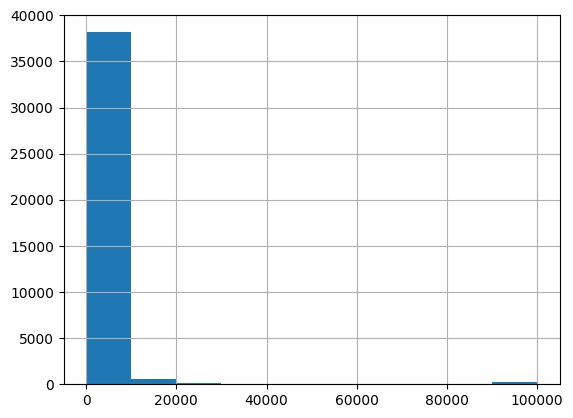

<Axes: >

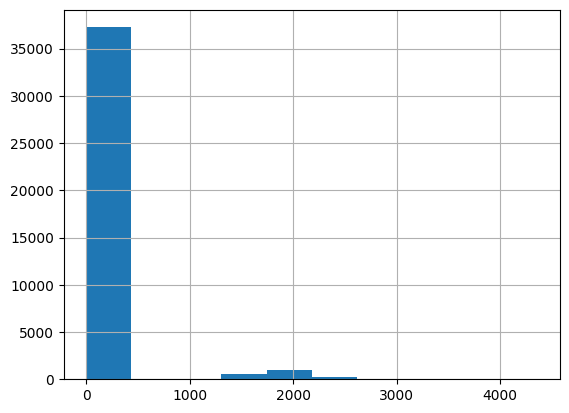

In [15]:
train_data_copy["capital-gain"].hist()
plt.show()
train_data_copy["capital-loss"].hist()

As we can see from this, we have some serious outliers in both. This might be why in both cases we have 0 as both the 1st, 2nd and 3rd quartile. However, when we inspect, there are 198 cases of the max value, meaning this might either be an error. It could also be a max cap, and the 198 are earning more than that.

In [16]:
print( (max(train_data_copy["capital-gain"]) == train_data_copy["capital-gain"]).sum())

198


We can test this by removing the maxed out data, and imputing it with 0

35788


C:\Users\FrederikDesktop\AppData\Local\Temp\ipykernel_23860\1504047566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_copy_withoutmax["capital-gain"].fillna(0, inplace=True)
C:\Users\FrederikDesktop\AppData\Local\Temp\ipykernel_23860\1504047566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_copy_withoutmax["capi

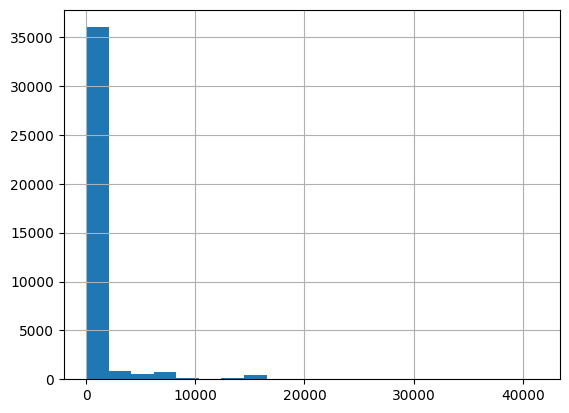

In [17]:
train_data_copy_withoutmax = train_data_copy[train_data_copy["capital-gain"] !=max(train_data_copy["capital-gain"])]
train_data_copy_withoutmax["capital-gain"].fillna(0, inplace=True)
train_data_copy_withoutmax["capital-gain"].hist(bins = 20)
train_data_copy_withoutmax["capital-gain"].describe()
print( (min(train_data_copy["capital-gain"]) == train_data_copy["capital-gain"]).sum())

As we can see, most of the datapoints are still 0, while all quartiles are also still 0. This means removing the outliers, is not going to do a lot, and as I expect the capital-gain and -loss to be good predictors of the final income, I am going to leave them as they were in the beginning without removing outliers.

We are however going to apply scaling to them and also to the fnlwgt features. 
However, we should first correct for skew, like we did with the age feature.

<Axes: >

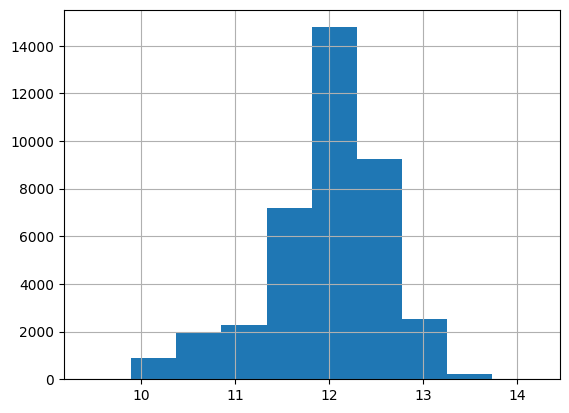

In [18]:
train_data_copy['fnlwgt'] = np.log(train_data_copy['fnlwgt'])
train_data_copy['fnlwgt'].hist()

As you can see this worked very well, however for the capital-gain and -loss, we cannot use log as there are 0 instances. However, as the data is very skewed, we can use cubic root instead of square root.

<Axes: >

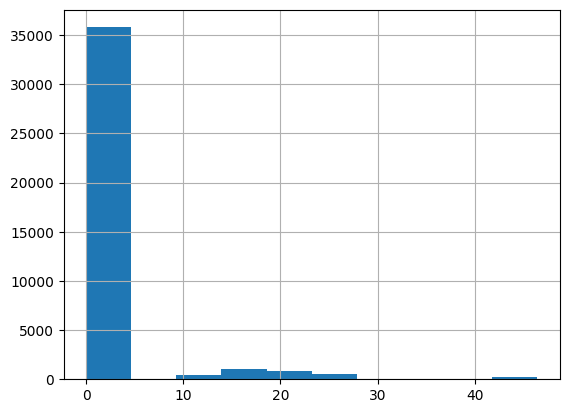

In [19]:
train_data_copy['capital-gain'] = np.power(train_data_copy['capital-gain'], 1/3)
train_data_copy['capital-gain'].hist()

<Axes: >

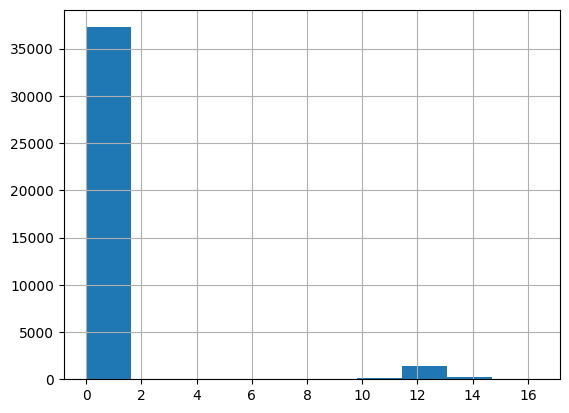

In [20]:
train_data_copy['capital-loss'] = np.power(train_data_copy['capital-loss'], 1/3)
train_data_copy['capital-loss'].hist()

Even tho the data is still skewed, the outliers are not as far away as they were before. We therefore move to standardization. Here we will use scikit learns standardscaler. 

In [23]:
std_scaler = StandardScaler()
train_data_num_copy = train_data_copy[["capital-loss", "capital-gain", "fnlwgt"]]
train_data_num_std_scaled_copy = std_scaler.fit_transform(train_data_num_copy)

## Select and Train a model

## Fine-Tune the model